In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.metrics import confusion_matrix as conf_mat
%matplotlib inline

In [6]:
df = pd.read_csv("C:\\Users\\Sean\\Desktop\\Fall 2016\\Text_Analytics\\Group Assignment 2\\Yelp Data Restaurant Reviews Ratings.csv")

In [104]:
# Took reviews out of data frame
df_no_rev = df[['stars', 'votes_cool', 'votes_funny', 'votes_useful', 'Cheap',\
                'Moderate', 'Expensive', 'VeryExpensive', 'American', 'Chinese',\
                'French', 'Japanese', 'Indian', 'Italian', 'Greek', 'Mediterranean',\
                'Mexican', 'Thai', 'Vietnamese', 'Others']]

# Divide the dataframe into train and test sets
train, test = train_test_split(df_no_rev, test_size = 0.4)

# Divide train and test into X and Y
train_X = train[['votes_cool', 'votes_funny', 'votes_useful', 'Cheap', 'Moderate',\
       'Expensive', 'VeryExpensive', 'American', 'Chinese', 'French',\
       'Japanese', 'Indian', 'Italian', 'Greek', 'Mediterranean',\
       'Mexican', 'Thai', 'Vietnamese', 'Others']]
train_Y = train[['stars']]
test_X = test[['votes_cool', 'votes_funny', 'votes_useful', 'Cheap', 'Moderate',\
       'Expensive', 'VeryExpensive', 'American', 'Chinese', 'French',\
       'Japanese', 'Indian', 'Italian', 'Greek', 'Mediterranean',\
       'Mexican', 'Thai', 'Vietnamese', 'Others']]
test_Y = test[['stars']]

# Turn dataframes into matrices 
train_Xmat = train_X.as_matrix()
train_Ymat = train_Y.as_matrix()
test_Xmat = test_X.as_matrix()
test_Ymat = test_Y.as_matrix()

In [131]:
clf = GBC(loss='deviance', learning_rate=0.01, n_estimators=10000,\
          subsample=1.0, min_samples_split=2, min_samples_leaf=1,\
          min_weight_fraction_leaf=0.0, max_depth=4, init=None,\
          random_state=None, max_features=None, verbose=0,\
          max_leaf_nodes=None, warm_start=False, presort='auto')

In [132]:
clf.fit(train_Xmat, train_Ymat)

C:\Users\Sean\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
              max_depth=4, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [270]:
def model_prediction_summary(Y_actual,Y_predicted,\
                             Y_actual2=None,Y_predicted2=None, \
                             labels = ['1','2','3','4','5'],\
                             title = 'In Sample',
                             title2 = 'Out of Sample'):
    
    """
    Shows prediction accuracy as percent correct.
    Plots a confusion matrix.
    """
    
    
    if Y_actual2 == None and Y_predicted2 == None :
        cm = conf_mat(Y_actual,Y_predicted)
        correct = float(sum((pd.DataFrame(Y_actual)[0] == pd.Series(Y_predicted))*1))
        total = float(len(pd.DataFrame(Y_actual)))
        correct_rate = correct/total
        
        print int(correct), "correct predictions, out of", int(total)
        print "Correct ratio: ",round(correct_rate*100,2),"%"
        labels = ['1','2','3','4','5']
        plt.figure()
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm)
        plt.title(title)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
    elif Y_actual2 != None and Y_predicted2 != None:

        fig, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1)
        cm1 = conf_mat(Y_actual,Y_predicted)
        cm2 = conf_mat(Y_actual2,Y_predicted2)
        
        fig = plt.figure(1)
        fig.set_size_inches(8*1.5,6*1.5)
        
        cax1 = ax1.matshow(cm1)
        ax1.set_title(title, y=1.2)
        fig.colorbar(cax1, ax = ax1)
        ax1.set_xticklabels([''] + labels)
        ax1.set_yticklabels([''] + labels)
        ax1.set_xlabel('Predicted')
        ax1.set_ylabel('True')

        cax2 = ax2.matshow(cm2)
        ax2.set_title(title2, y=1.2)
        fig.colorbar(cax2, ax = ax2)
        ax2.set_xticklabels([''] + labels)
        ax2.set_yticklabels([''] + labels)
        ax2.set_xlabel('Predicted')
        ax2.set_ylabel('True')
        
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None,\
                            wspace=None,hspace=None)
        
        fig.tight_layout()
        
        plt.show()
        
        correct = float(sum((pd.DataFrame(Y_actual)[0] == pd.Series(Y_predicted))*1))
        total = float(len(pd.DataFrame(Y_actual)))
        correct_rate = correct/total
        print
        print
        print "In sample predictions:"
        print int(correct), "correct predictions, out of", int(total)
        print "Accuracy: ",round(correct_rate*100,2),"%"
        print
        print
        correct2 = float(sum((pd.DataFrame(Y_actual2)[0] == pd.Series(Y_predicted2))*1))
        total2 = float(len(pd.DataFrame(Y_actual2)))
        correct_rate2 = correct2/total2
        
        print "Out of sample predictions:"
        print int(correct2), "correct predictions, out of", int(total2)
        print "Accuracy: ",round(correct_rate2*100,2),"%"
    else:
        raise ValueError('You done screwed the pooch')

In [264]:
j = clf.predict(train_Xmat)
k = clf.predict(test_Xmat)

In [265]:
cm2 = conf_mat(test_Ymat,k)

C:\Users\Sean\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
C:\Users\Sean\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


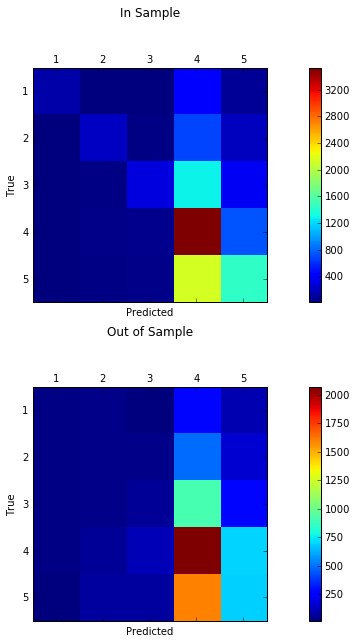



In sample predictions:
5641 correct predictions, out of 11999
Accuracy:  47.01 %


Out of sample predictions:
2884 correct predictions, out of 8000
Accuracy:  36.05 %


In [271]:
model_prediction_summary(train_Ymat,j,\
                             test_Ymat,k, \
                             labels = ['1','2','3','4','5'],\
                             title = 'In Sample',
                             title2 = 'Out of Sample')